In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns # used for jitter plot
import matplotlib.pyplot as plt
from scipy import stats
import time
from datetime import datetime
%matplotlib inline

>Excercise: Connecting the dots and recreating plots from DAOST (the book) but using our own favorite dataset.
>
>* Let's make a jitter-plot (that is, code up something like Figure 2-1 from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the exact time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example).


the point of this exercise is to show that arrests happen at every 5 or 10 minutes.

take arrests in a certain time period (e.g. 13-14) of every monday from a 6 months period and make a jitter plot to show that they form hard lines, to show that police offers round up or down time points instead of noting down the exact time

In [2]:
print("current directory =>", os.getcwd()) # check the current directory

# check if the needed csv. file is in the current directory)
print("files in directory =>")
for file in os.listdir(os.getcwd()):
    if ".csv" in file and "Police" in file:
        print("File found! =>", file)
        pd_data = pd.read_csv(file) #load the file
        break
        
pd_data.head() #print the head of the file

current directory => /Users/aleksanderfrese/Dropbox/DTU/2nd semester/02806 Social data analysis and visualization
files in directory =>
File found! => Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


In [3]:
#check crime types by listing unique values in the df['Category'] column
for crimetype in sorted(pd_data.Category.unique()):
    print(crimetype)

ARSON
ASSAULT
BAD CHECKS
BRIBERY
BURGLARY
DISORDERLY CONDUCT
DRIVING UNDER THE INFLUENCE
DRUG/NARCOTIC
DRUNKENNESS
EMBEZZLEMENT
EXTORTION
FAMILY OFFENSES
FORGERY/COUNTERFEITING
FRAUD
GAMBLING
KIDNAPPING
LARCENY/THEFT
LIQUOR LAWS
LOITERING
MISSING PERSON
NON-CRIMINAL
OTHER OFFENSES
PORNOGRAPHY/OBSCENE MAT
PROSTITUTION
RECOVERED VEHICLE
ROBBERY
RUNAWAY
SECONDARY CODES
SEX OFFENSES, FORCIBLE
SEX OFFENSES, NON FORCIBLE
STOLEN PROPERTY
SUICIDE
SUSPICIOUS OCC
TREA
TRESPASS
VANDALISM
VEHICLE THEFT
WARRANTS
WEAPON LAWS


I choose to work with the crimetype/category `Kidnapping`.

In [76]:
# get all robbery incidents as subset
pd_kidnap = pd_data.loc[pd_data['Category'] == "KIDNAPPING"]
pd_kidnap.shape # check how many rows the subset have, i.e. how many robbery incidents have been registered

(5346, 13)

Looks like there are **5.346** registered robberies.

In [77]:
pd_kidnap.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
238,150100213,KIDNAPPING,FALSE IMPRISONMENT,Monday,02/02/2015,10:20,INGLESIDE,NONE,200 Block of BLYTHDALE AV,-122.420557,37.710895,"(37.7108945814914, -122.420556751442)",15010021326142
493,150102463,KIDNAPPING,FALSE IMPRISONMENT,Monday,02/02/2015,21:30,NORTHERN,"ARREST, BOOKED",3000 Block of BUCHANAN ST,-122.432232,37.797991,"(37.7979906413415, -122.432231936901)",15010246326142
762,150104754,KIDNAPPING,"KIDNAPPING, JUVENILE VICTIM",Tuesday,02/03/2015,15:59,TENDERLOIN,NONE,8TH ST / MARKET ST,-122.414744,37.778719,"(37.778719262789, -122.414743835382)",15010475415021
1883,150114662,KIDNAPPING,CHILD STEALING,Wednesday,01/28/2015,00:01,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",15011466226070
2509,150120211,KIDNAPPING,CHILD STEALING,Sunday,02/08/2015,09:30,MISSION,NONE,600 Block of VALENCIA ST,-122.421748,37.762744,"(37.7627436601147, -122.421747650463)",15012021126070


In [79]:
# add a Datetime column based on the date and time column in the dataset
pd_kidnap['Datetime'] = pd.to_datetime(pd_kidnap['Date'] + ' ' + pd_kidnap['Time'])

/anaconda2/envs/anaconda37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


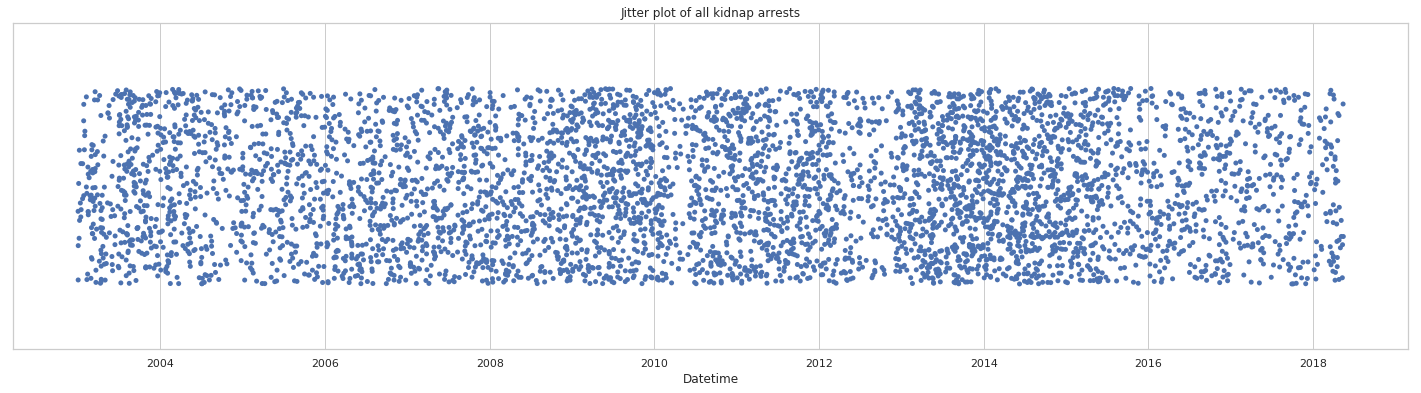

In [89]:
#create jitterplot with new Datetime col as x axis
fig, ax = plt.subplots(figsize=(25,6)) # set figuresize
sns.set(style="whitegrid")
#tips = sns.load_dataset(pd_robbery)
ax = sns.stripplot(ax=ax, data=pd_kidnap, x=pd_kidnap["Datetime"], jitter=0.3)
plt.title("Jitter plot of all kidnap arrests")
plt.show()

We see here a faint grouping of points, most prevalent around 2014 and around 2011-2012. Interestingly, the points around 2014 indicate that most kidnappings happen in the winter period. It probably has something to do with it being darker.

In [190]:
pd_kidnap_sun = pd_kidnap.loc[(pd_kidnap['DayOfWeek'] == "Sunday") & (pd_kidnap['Category'] == "KIDNAPPING")].set_index("Datetime").between_time("00:00", "01:00")

In [191]:
# reset the index and sort values to have them in the right order on the jitter plot
pd_kidnap_sun = pd_kidnap_sun.reset_index().sort_values(by="Time")

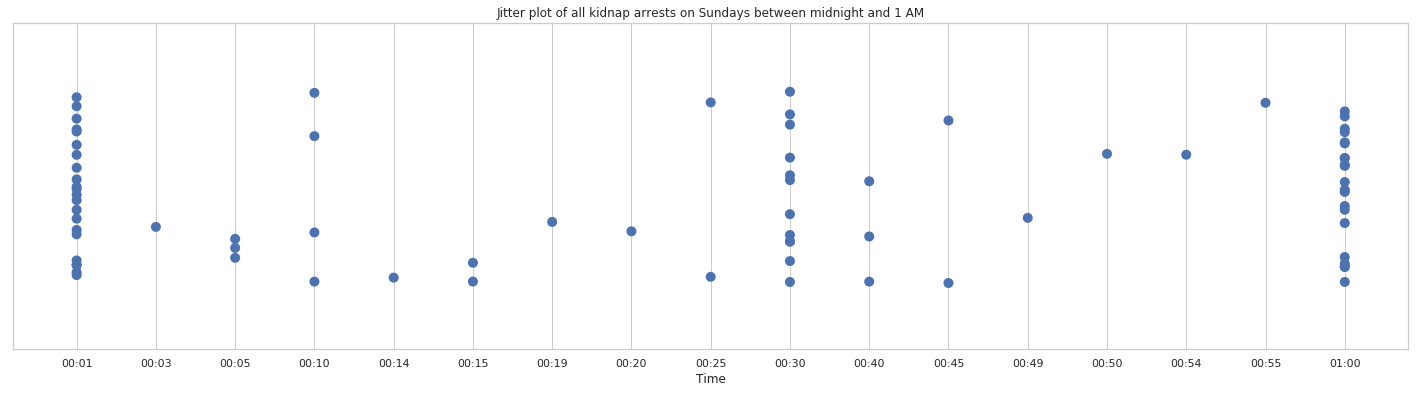

In [250]:
# create jitter plot for kidnap arrests on sundays between midnight and 1 AM
plt.clf
fig, ax = plt.subplots(figsize=(25,6)) # set figuresize
sns.set(style="whitegrid")
ax = sns.stripplot(ax=ax, data=pd_kidnap_sun, x=pd_kidnap_sun["Time"], jitter=0.3, size=10)
plt.title("Jitter plot of all kidnap arrests on Sundays between midnight and 1 AM")
plt.show()

It seems as though most arrests affiliated with kidnapping are registered either at 00:01, 00:30 or 01:00. Besides these points, most arrests fall onto points in time that are in the five minute interval. In reality, it is very unlikely that most arrests happen only every 5 minutes, which indicates that many police officers round up or down the time when noting the time of an arrest.

>* Last time, we did lots bar-plots. Today, we'll play around with histograms (creating two versions of Figure 2-2). I think the GPS data could be fun to see this way.
    * This time, pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
    * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram -- that gives you the counts and then you do your own plotting.

For this exercise, I choose `PROSTITUTION` and `SUICIDE`. Alot of suicides in the Bay Area likely happens from bridges, while prostitution likely happens in the city, thus they likely have different geographical patterns.

In [211]:
#pd_pro_sui = pd_data.loc[(pd_data['Category'] == "PROSTITUTION") | (pd_data['Category'] == "SUICIDE")]
pd_pro = pd_data.loc[pd_data['Category'] == "PROSTITUTION"]
pd_sui = pd_data.loc[pd_data['Category'] == "SUICIDE"]

In [212]:
print("pd_pro shape =>", pd_pro.shape)
print("pd_sui shape =>", pd_sui.shape)

pd_pro shape => (16701, 13)
pd_sui shape => (1292, 13)


In [216]:
pd_pro.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
3677,150130458,PROSTITUTION,ENGAGING IN LEWD CONDUCT - PROSTITUTION RELATED,Wednesday,02/11/2015,22:15,RICHMOND,NONE,500 Block of JOHNFKENNEDY DR,-122.466205,37.772541,"(37.7725405391593, -122.466204667893)",15013045813111
5467,150146461,PROSTITUTION,HUMAN TRAFFICKING,Saturday,01/31/2015,00:01,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",15014646113045


In [215]:
pd_sui.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
6925,150159179,SUICIDE,ATTEMPTED SUICIDE,Saturday,02/21/2015,02:10,BAYVIEW,EXCEPTIONAL CLEARANCE,1600 Block of KIRKWOOD AV,-122.390873,37.738752,"(37.7387519497438, -122.390872523812)",15015917960010
8063,150168619,SUICIDE,ATTEMPTED SUICIDE,Tuesday,02/24/2015,03:10,INGLESIDE,NONE,100 Block of BROOKDALE AV,-122.423098,37.710305,"(37.7103045151288, -122.423098270217)",15016861960010


Because, there are many more prostitution registrations than suicides, a subset must be taken.

In [229]:
pd_pro = pd_pro.loc[pd_pro["DayOfWeek"] == "Monday"] # only take prostitution arrests on mondays, yields around 1100

In [231]:
pd_pro.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
7622,150164918,PROSTITUTION,LOITERING FOR PURPOSE OF PROSTITUTION,Monday,02/23/2015,00:20,MISSION,"ARREST, BOOKED",500 Block of CAPP ST,-122.417956,37.757880,"(37.7578801214437, -122.417955821717)",15016491813075
21905,140080625,PROSTITUTION,SOLICITS FOR ACT OF PROSTITUTION,Monday,01/27/2014,19:15,NORTHERN,"ARREST, CITED",SUTTER ST / LARKIN ST,-122.418468,37.787965,"(37.7879652569797, -122.418467747931)",14008062513060
21920,140080766,PROSTITUTION,SOLICITS FOR ACT OF PROSTITUTION,Monday,01/27/2014,20:00,NORTHERN,"ARREST, CITED",LARKIN ST / SUTTER ST,-122.418468,37.787965,"(37.7879652569797, -122.418467747931)",14008076613060
22604,140101061,PROSTITUTION,SOLICITS FOR ACT OF PROSTITUTION,Monday,02/03/2014,19:38,MISSION,"ARREST, CITED",19TH ST / SHOTWELL ST,-122.415930,37.760433,"(37.7604330003754, -122.415929849548)",14010106113060
22606,140101180,PROSTITUTION,SOLICITS FOR ACT OF PROSTITUTION,Monday,02/03/2014,20:19,MISSION,"ARREST, CITED",19TH ST / SHOTWELL ST,-122.415930,37.760433,"(37.7604330003754, -122.415929849548)",14010118013060


In [238]:
pro_lat = pd_pro["Y"].values
sui_lat = pd_sui["Y"].values

number of bins => 50


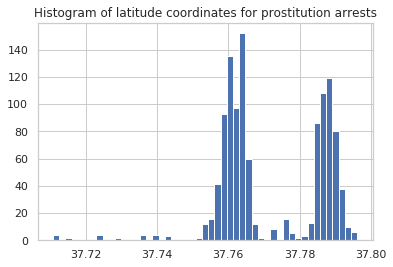

In [295]:
pro_values, pro_bins, pro_chart = plt.hist(pro_lat, bins=49)
print("number of bins =>", len(pro_bins))
plt.title("Histogram of latitude coordinates for prostitution arrests")
plt.show(pro_chart)

number of bins => 50


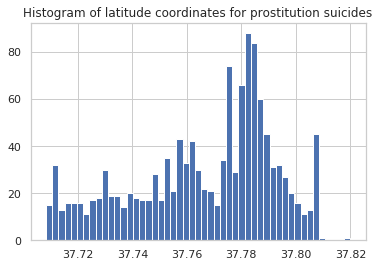

In [296]:
sui_values, sui_bins, sui_chart = plt.hist(sui_lat, bins=49)
print("number of bins =>", len(sui_bins))
plt.title("Histogram of latitude coordinates for prostitution suicides")
plt.show(sui_chart)

From the two histograms, it can clearly be seen that the latitudes of the arrests affiliated with prostitution and suicide are very different. Prostitution arrests are very focused around two particular latitude coordinates, while suicide arrests are more spread out in terms of latitude. This actually counters the hypothesis stated earlier, that suicides all happen from bridges and thus would be very concentrated - the data shows that suicide arrests are in fact quite spread out.

>* Next up is recreating Figure 2-4 from DAOST, but with the data you used to create Figure 2.1. To create the kernel density plot, you can either use `gaussian_kde` from `scipy.stats` or you can use `seaborn.kdeplot`.

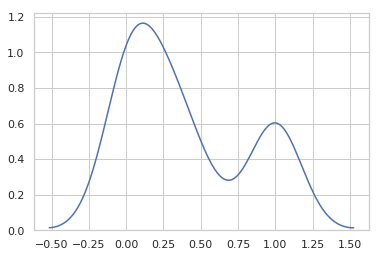

In [345]:
plt.clf
sns.kdeplot([x.replace(":",".") for x in pd_kidnap_sun["Time"].values]) # replace : with . to allow seaborn to work with the data
plt.show()

This kernel density plot seems to fit well with the data. Peaks at 1.00 and somewhere between 00:01 and 00:30.

>* Now grab 25 random timepoints from the dataset you've just plotted and create the same Figure 2-4 plot once again. Does this shed light on why I think KDEs can bee misleading?

Not sure if i understand this.

>* Create your own two versions of Figure 2-11, but using the GPS data you used for your version of Figure 2-2. Comment on the result. It is not easy to create this plot from scracth, bHint: Take a look at the scipy.stats.probplot function.

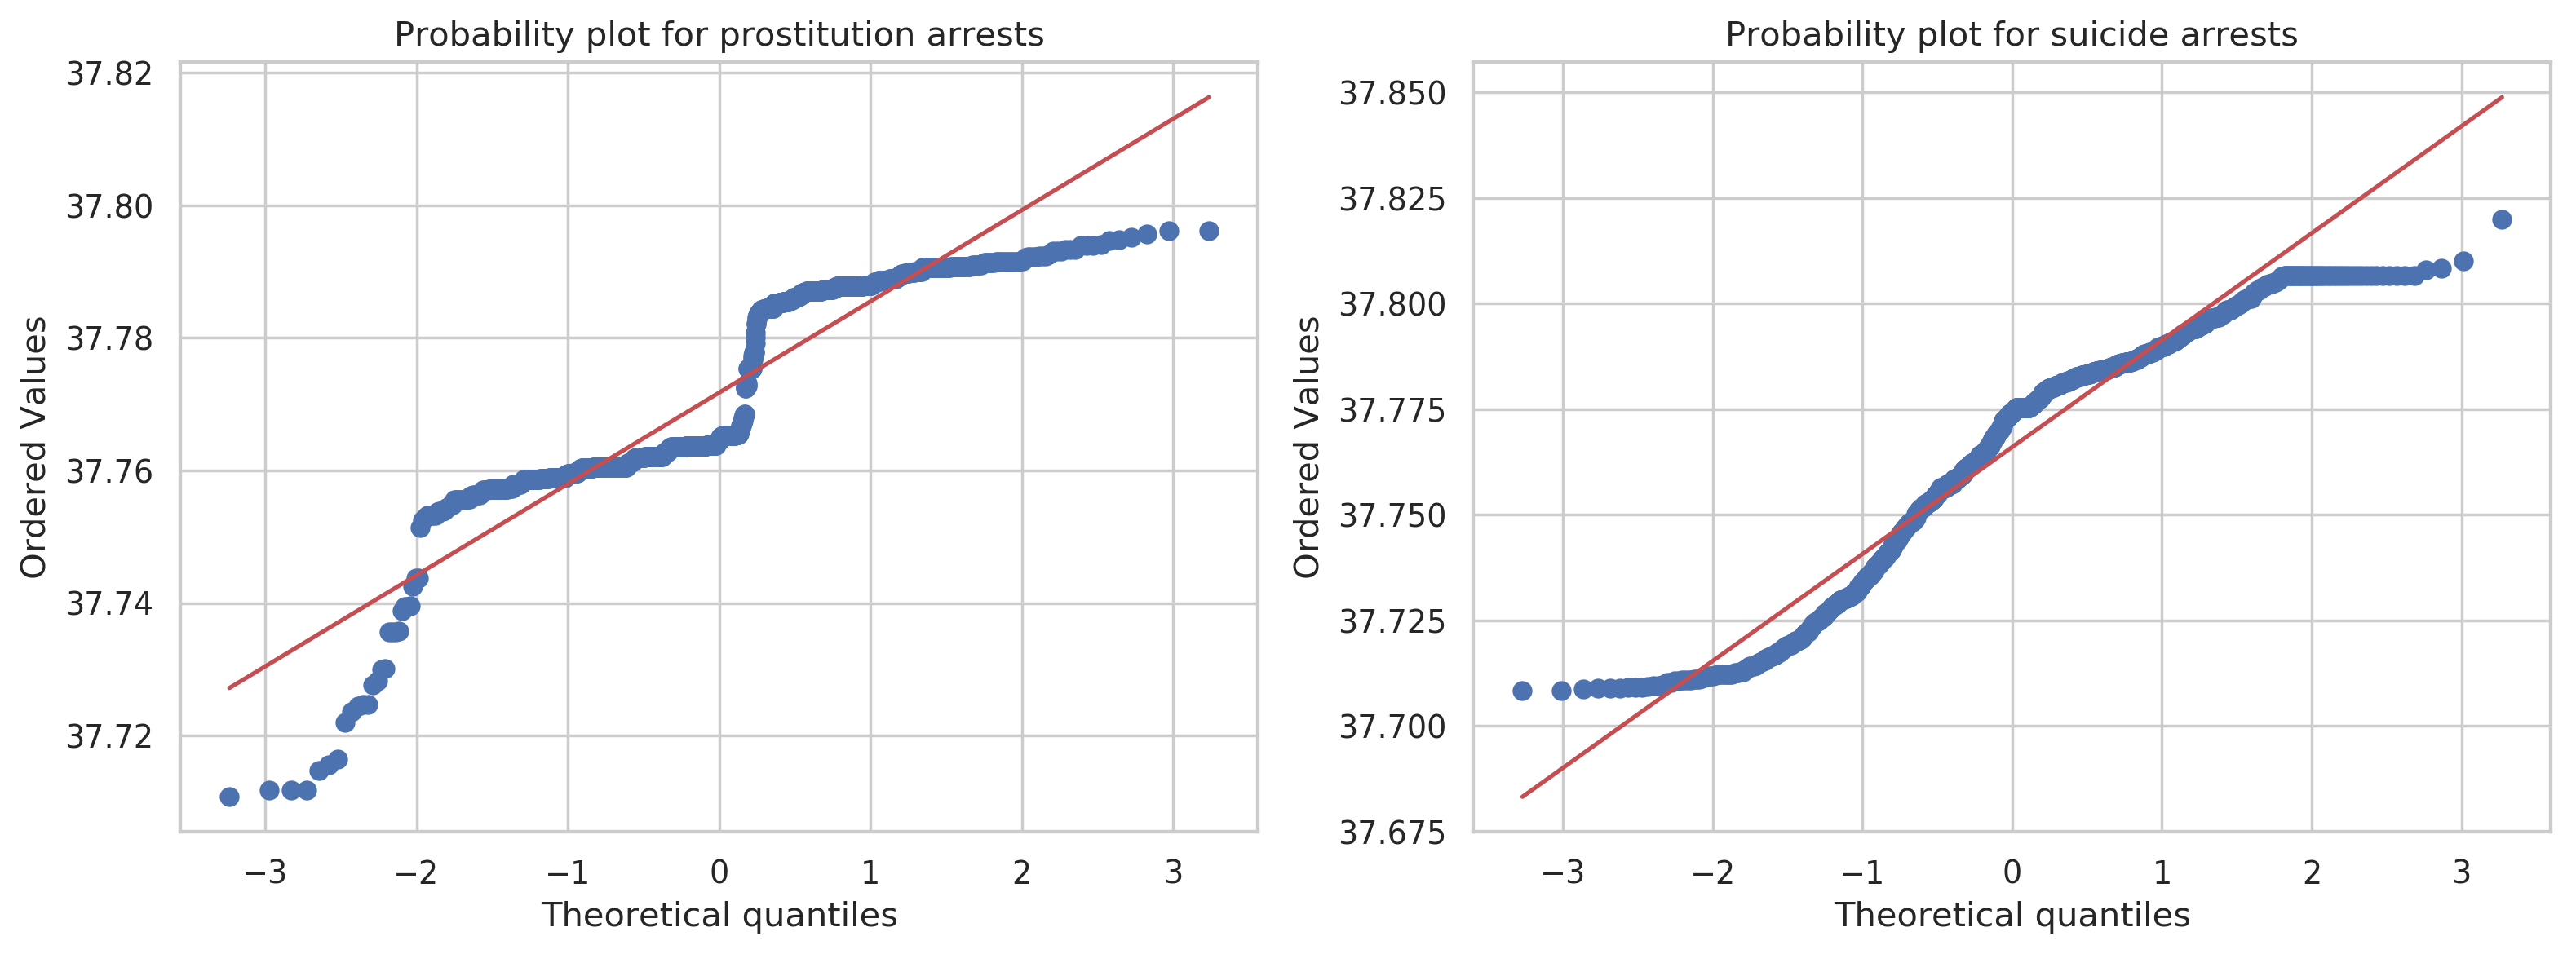

In [348]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5), dpi=250) # multi-column plot

stats.probplot(pro_lat, plot=axs[0])
axs[0].set_title("Probability plot for prostitution arrests")

stats.probplot(sui_lat, plot=axs[1])
axs[1].set_title("Probability plot for suicide arrests")

plt.show()

From the probabiliy plots it is evident that the latitude coordinates for the suicide arrests more closely form a normal distribution that those of the prostitution arrests. This is consistent with the histograms.

>* OK, we're almost done, but we need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. For the 15 focus crimes defined last week.
    * For the full time-span of the data, calulate **the number of crimes per day** within each category for the entire duration of the data.
    * Create a box-and whiskers plot showing the mean, median, quantiles, etc for all 15 crime-types side-by-side. There are many ways to do this, I like to use matplotlibs's built in functionality
    * What does this plot reveal that you can't see in the plots from last time?

In [37]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
print("number of focuscrimes =", len(focuscrimes))

number of focuscrimes = 14


In [5]:
# add datetime col
pd_data['Datetime'] = pd.to_datetime(pd_data['Date'] + ' ' + pd_data['Time'])

In [82]:
pd_data[['IncidntNum', 'Category', 'Date', 'Time', 'Datetime']].head()

,IncidntNum,Category,Date,Time,Datetime
0,150060275,NON-CRIMINAL,01/19/2015,14:00,2015-01-19 14:00:00
1,150098210,ROBBERY,02/01/2015,15:45,2015-02-01 15:45:00
2,150098210,ASSAULT,02/01/2015,15:45,2015-02-01 15:45:00
3,150098210,SECONDARY CODES,02/01/2015,15:45,2015-02-01 15:45:00
4,150098226,VANDALISM,01/27/2015,19:00,2015-01-27 19:00:00


Category => ASSAULT
Category => WEAPON LAWS
Category => DRUNKENNESS
Category => DRUG/NARCOTIC
Category => VANDALISM
Category => LARCENY/THEFT
Category => PROSTITUTION
Category => TRESPASS
Category => STOLEN PROPERTY
Category => DRIVING UNDER THE INFLUENCE
Category => ROBBERY
Category => DISORDERLY CONDUCT
Category => VEHICLE THEFT
Category => BURGLARY


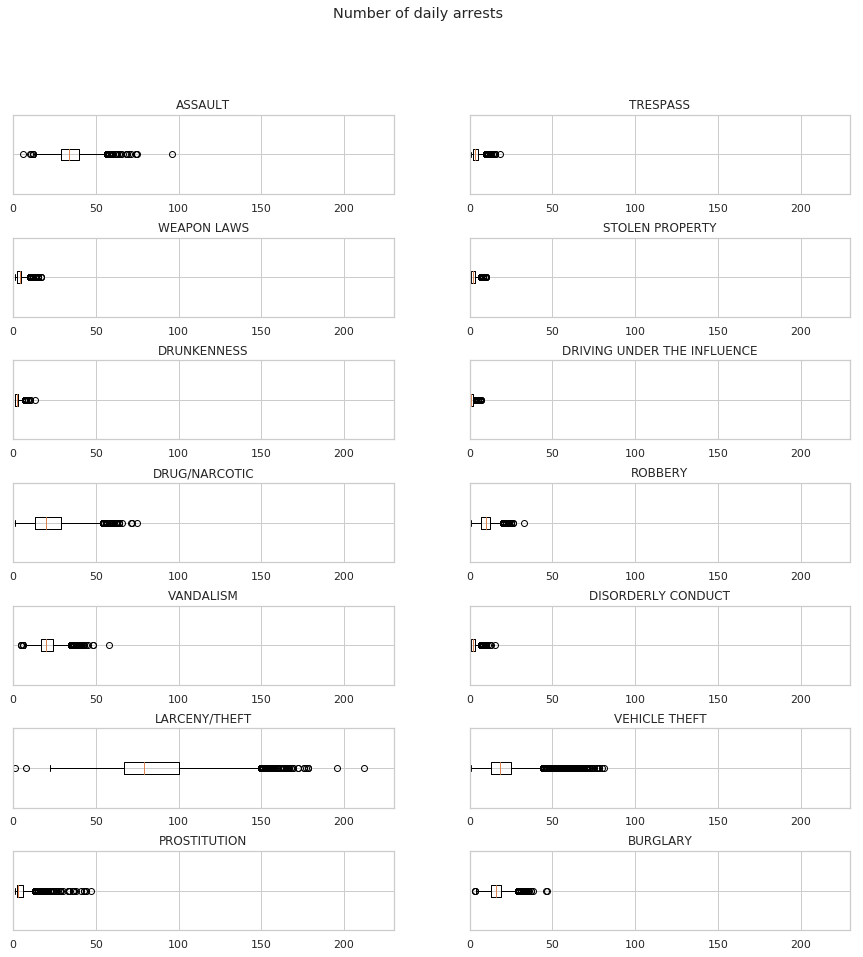

done!


In [156]:
fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(15, 15)) # multi-column plot
ax_row = 0 # iterable to change plot placement
ax_col = 0 # iterable to change plot placement
cnt = 0 # counter to control when to change column

for category in focuscrimes:
    pd_category = pd_data.loc[pd_data["Category"] == category]
    print("Category =>", category)
    #print("row, col =>", ax_row, ax_col) # debugging
    
    category_daily_arrests = pd_category.groupby(['Date']).agg(['count'])['IncidntNum'].values
    #print(category_daily_arrests) # debugging
    
    axs[ax_row][ax_col].boxplot(category_daily_arrests, sym="o", vert=False)
    axs[ax_row][ax_col].set_title(str(category))
    axs[ax_row][ax_col].set_xlim(0, 230) # set x axis range to the same for all plots to make them comparable, value of 230 gotten from larcency/theft, which has the highest daily arrests
    axs[ax_row][ax_col].tick_params(axis="y", which="both", labelleft=False) # remove the '1' on the y axis
    plt.subplots_adjust(hspace = 0.55)
    
    cnt += 1 # increment control counter
    ax_row += 1 # increment the plot placement iterable
    if cnt == 7:
        ax_row = 0 # reset row number
        ax_col = 1 # change column
    
    #break # debugging

fig.suptitle("Number of daily arrests")
plt.show()
print("done!")

These boxplots reveal how big of a fluctuation or spread there is in the daily number of arrests for of the crime categories. Some have a big fluctuation (e.g. `LARCENCY/THEFT`, which spreads from almost 0 to over 200) and some have a small fluctuation (e.g. `ROBBERY`). The crime categories with low fluctuation could be said to happen somewhat consistenly on a daily basis.

>* Hmm. Actually, I wanted to show you guys another interesting use of box plots. Now let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is **the average time-of-day** that a crime takes place. There are many ways to do this, but let me describe one way to do it.
    * For datapoint, the only thing you care about is the time-of-day, so discard everything else.
    * You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. I can think of two ways to deal with this.
        * For each time-of-day, simply encode it as seconds since midnight.
        * Or keep each whole hour, and convert the minute/second count to a percentage of an hour. So 10:15 → 10.25, 8:40 → 8.67, etc.
    * Now you can create box-plots to create an overview of when various crimes occur. Note that these plot have quite a different interpretation than ones we created in the previous exercise. Cool, right?

Category => ASSAULT
Category => WEAPON LAWS
Category => DRUNKENNESS
Category => DRUG/NARCOTIC
Category => VANDALISM
Category => LARCENY/THEFT
Category => PROSTITUTION
Category => TRESPASS
Category => STOLEN PROPERTY
Category => DRIVING UNDER THE INFLUENCE
Category => ROBBERY
Category => DISORDERLY CONDUCT
Category => VEHICLE THEFT
Category => BURGLARY


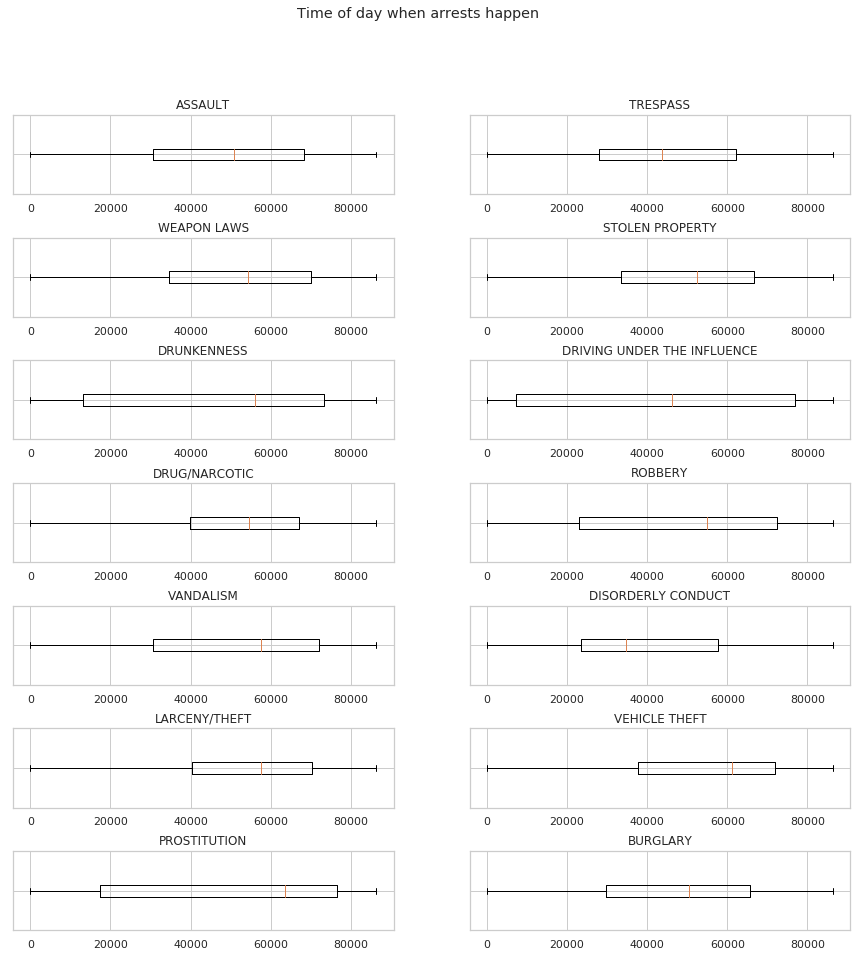

done!


In [157]:
fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(15, 15)) # multi-column plot
ax_row = 0 # iterable to change plot placement
ax_col = 0 # iterable to change plot placement
cnt = 0 # counter to control when to change column

for category in focuscrimes:
    print("Category =>", category)
    pd_category = pd_data[['Category', 'Time']].loc[pd_data["Category"] == category]
    pd_category['Seconds'] = pd_category['Time'].str.split(":").apply(lambda x: int(x[0]) * 3600 + int(x[1]) * 60)
    
    #print("row, col =>", ax_row, ax_col) # debugging
    
    #category_daily_arrests = pd_category.groupby(['Date']).agg(['count'])['IncidntNum'].values
    #print(category_daily_arrests) # debugging
    
    data = pd_category['Seconds'].loc[pd_category["Category"] == category].values
    
    axs[ax_row][ax_col].boxplot(data, sym="o", vert=False)
    axs[ax_row][ax_col].set_title(str(category))
    #axs[ax_row][ax_col].set_xlim(0, 230) # set x axis range to the same for all plots to make them comparable, value of 230 gotten from larcency/theft, which has the highest daily arrests
    axs[ax_row][ax_col].tick_params(axis="y", which="both", labelleft=False) # remove the '1' on the y axis
    plt.subplots_adjust(hspace = 0.55)
    
    cnt += 1 # increment control counter
    ax_row += 1 # increment the plot placement iterable
    if cnt == 7:
        ax_row = 0 # reset row number
        ax_col = 1 # change column
    
    #break # debugging

fig.suptitle("Time of day when arrests happen")
plt.show()
print("done!")

From these boxplots it is clear that arrests for some crime categories happen at more specific times during the day/night (i.e. that crime type has a higher probability of happening in that time frame), while others occur more evenly and continuously during the day/night.